*Теоретический материал:* https://youtu.be/tsLS2G-gp5U?t=304

# **Import библиотек**

*Разбор данного раздела:* https://youtu.be/tsLS2G-gp5U?t=1694


In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
!pip install SpeechRecognition # библиотека с популярными сервисами распознавания речи
import speech_recognition as sR
!pip install jiwer 
from jiwer import wer # модуль метрики качества в распознавании речи
import numpy as np # библиотека для работы с массивами данных
from matplotlib import pyplot as plt # интерфейс для построения графиков простых функций
from IPython.display import HTML, Audio # загружаем модуль чтобы обратиться к HTML для записи аудио с микрофона в ноутбуке
from google.colab import files # модуль для загрузки файлов
from google.colab.output import eval_js
from base64 import b64decode # модуль для кодировки/раскодировки аудиозаписи(64-разрядный код)
from scipy.io.wavfile import read as wav_read # для чтения WAV формата
import io
import scipy # воспользуемся модулями библиотеки для работы со звуковой дорожкой
import librosa # для параметризации аудио
import os # модуль для работы с операционной системой(воспользуемся методами работы с каталогами)
from sklearn.model_selection import train_test_split # модуль для разбивки данных на обучающую и тестовую выборки
from keras.utils import to_categorical # загружаем утилиты кераса для one hot кодировки
from tqdm import tqdm # быстрый, удобный progress bar для Python
from keras.optimizers import Adam, RMSprop, Adadelta # загружаем алгоритмы обучения/оптимизации
from keras.models import Sequential # последовательная модель нейросети кераса
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization # загружаем необходимые слои для нейросети
import IPython.display as ipd #Для проигрывания аудио

     |████████████████████████████████| 32.8MB 1.2MB/s 
     |████████████████████████████████| 51kB 2.5MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.0-cp36-cp36m-linux_x86_64.whl size=144799 sha256=bdb5bdffdcad6ca18d7aa8bda1733dc7085cdcddded8cd7438b4ef01ea4cd2fd
  Stored in directory: /root/.cache/pip/wheels/de/c2/93/660fd5f7559049268ad2dc6d81c4e39e9e36518766eaf7e342
Successfully built python-Levenshtein


Using TensorFlow backend.


In [ ]:
from google.colab import drive # подключаем гугл драйв диск для загрузки файлов
drive.mount('/content/drive')

Mounted at /content/drive


# **Пример распознавания с google api**

*Разбор данного раздела:* https://youtu.be/tsLS2G-gp5U?t=1732



In [ ]:
##########################
# Зададим функцию распознавания аудио с помощью speech_recognition
##########################
def recognizeAudio(filename, duration=None):
  AUDIO_FILE = os.path.join(filename) # задаем путь к аудиофайлу
  r = sR.Recognizer() # создаем объект класса Recognizer
  with sR.AudioFile(AUDIO_FILE) as source:
    audio = r.record(source, duration=duration) # считываем аудиофайл

  return r.recognize_google(audio, language='ru') # запускаем распознавание

In [ ]:
# Распознавание на примере короткой фразы без шумов на заднем плане
team_path_gde = '/content/drive/My Drive/Занятия/Майский курс/Занятие #26. Распознавание речи/Аудио для Speech recognition/где мы встретимся.wav'
# Распознавание на примере длинной фразы без шумов на заднем плане
team_path_wilhelm = '/content/drive/My Drive/Занятия/Майский курс/Занятие #26. Распознавание речи/Аудио для Speech recognition/Sample.wav'
# Распознавание отрезка из видео на ютубе с негромкой фоновой музыкой
team_path_anews = '/content/drive/My Drive/Занятия/Майский курс/Занятие #26. Распознавание речи/Аудио для Speech recognition/аудио_видос_короткий.wav'
# Распознавание отрезка из песни с четкой речью 
team_path_splin = '/content/drive/My Drive/Занятия/Майский курс/Занятие #26. Распознавание речи/Аудио для Speech recognition/Сплин_Романс.wav'
# Распознавание отрезка из песни с менее четкой речью и более зашумленной
team_path_uvarova = '/content/drive/My Drive/Занятия/Майский курс/Занятие #26. Распознавание речи/Аудио для Speech recognition/Аня Уварова_Улыбка.wav'
# Распознавание отрывка из интервью
team_path_interview = '/content/drive/My Drive/Занятия/Майский курс/Занятие #26. Распознавание речи/Аудио для Speech recognition/интервью.wav'
# Распознавание отрывка из политических дебатов (транскрипт здесь даже вручную сделать непросто, так как голоса накладываются друг на друга,
# поэтому для подсчета WER будем учитывать только те слова, которые слышно лучше)
team_path_debaty = '/content/drive/My Drive/Занятия/Майский курс/Занятие #26. Распознавание речи/Аудио для Speech recognition/дебаты шумные.wav'


In [ ]:
ipd.display(ipd.Audio(team_path_gde))

In [ ]:
original = 'где мы встретимся'
res = recognizeAudio(team_path_gde)

print('Оригинал:               ', original)
print('Результат распознавания:', res)
print('WER:', wer(original.lower(), res.lower())) # считаем метрику качества

Оригинал:                где мы встретимся
Результат распознавания: Где мы встретимся
WER: 0.0


In [ ]:
# client_path_wilhelm = '/content/drive/My Drive/Аудио для Speech recognition/Sample.wav'
original = 'Вильгельм гауф карлик нос господин совсем не правы люди думающие что феи и волшебники существовали только во времена гаруна аль рашида властелина багдада или даже утверждающие что те повествования о деятельности духов и их повелителей которые слышишь от рассказчиков на городских рынках неверны феи существуют еще и теперь не так давно я сам был свидетелем одного происшествия в котором явно участвовали духи как я вам расскажу много лет тому назад в одном значительном городе моего милого отечества Германии скромно и честно жил сапожник с женой днём Он сидел на углу улицы и чинил башмаки и туфли делал он может быть и новые если это кто-нибудь доверял ему но в таком случае он должен был сперва купить кожу так как был беден и не имел запасов его жена продавала овощи и фрукты которые разводила в маленьком садике за городом и многие охотно покупали у неё потому что она была чисто и опрятно одета и умела красиво разложить и выставить свой товар у них был красивый мальчик приятный лицом хорошо сложенный и для своего восьмилетнего возраста уже довольно большой он обыкновенно сидел около матери на овощном рынке относил также домой часть плодов тем женщинам или поварам которые много закупали у жены сапожника и редко возвращался с такой прогулки без красивого цветка монетки или пирога Потому что господам этих поваров было приятно видеть когда приводили в дом красивого мальчика и они всегда щедро одаривали его однажды жена сапожника по обыкновению опять сидела на рынке перед ней было несколько корзин с капустой и другими овощами разные травы и семена а также в корзиночке поменьше ранние груши яблоки и абрикосы маленький Якоб'
res = recognizeAudio(team_path_wilhelm, duration=120) # на больших файлах желательно указывать длительность, чтобы избежать ошибки распознавания

print('Оригинал:               ', original)
print('Результат распознавания:', res)
print('WER:', wer(original.lower(), res.lower()))

Оригинал:                Вильгельм гауф карлик нос господин совсем не правы люди думающие что феи и волшебники существовали только во времена гаруна аль рашида властелина багдада или даже утверждающие что те повествования о деятельности духов и их повелителей которые слышишь от рассказчиков на городских рынках неверны феи существуют еще и теперь не так давно я сам был свидетелем одного происшествия в котором явно участвовали духи как я вам расскажу много лет тому назад в одном значительном городе моего милого отечества Германии скромно и честно жил сапожник с женой днём Он сидел на углу улицы и чинил башмаки и туфли делал он может быть и новые если это кто-нибудь доверял ему но в таком случае он должен был сперва купить кожу так как был беден и не имел запасов его жена продавала овощи и фрукты которые разводила в маленьком садике за городом и многие охотно покупали у неё потому что она была чисто и опрятно одета и умела красиво разложить и выставить свой товар у них был красивый мальчи

In [ ]:
ipd.display(ipd.Audio(team_path_anews))

In [ ]:
original = 'anews.ru первое устройство для распознавания речи появилось в 1952 году оно могло понимать произнесённые человеком цифры 40 лет спустя были представлены первые коммерческие программы распознающие речь человека они были предназначены для людей которые в силу физиологических особенностей не могли набирать текст вручную сейчас же функция распознавания речи есть практически в любом смартфоне Она позволяет нам взаимодействовать голосом с приложениями облегчая и упрощая нашу жизнь как же работает распознавание речи об этом в сегодняшнем выпуске'
res = recognizeAudio(team_path_anews)

print('Оригинал:               ', original)
print('Результат распознавания:', res)
print('WER:', wer(original.lower(), res.lower()))

Оригинал:                anews.ru первое устройство для распознавания речи появилось в 1952 году оно могло понимать произнесённые человеком цифры 40 лет спустя были представлены первые коммерческие программы распознающие речь человека они были предназначены для людей которые в силу физиологических особенностей не могли набирать текст вручную сейчас же функция распознавания речи есть практически в любом смартфоне Она позволяет нам взаимодействовать голосом с приложениями облегчая и упрощая нашу жизнь как же работает распознавание речи об этом в сегодняшнем выпуске
Результат распознавания: канистру первое устройство для распознавания речи появилась в 1952 году она могла понимать произнесенные человеком цифры 40 лет спустя были представлены первые коммерческие программы распознающие речь человека они были предназначены для людей которые в силу физиологических особенностей не могли набирать текст вручную сейчас же функция распознавания речи есть практически в любом смартфоне Она позволяет 

In [ ]:
ipd.display(ipd.Audio(team_path_splin))

In [ ]:
# client_path_splin = '/content/drive/My Drive/Аудио для Speech recognition/Сплин_Романс.wav'
original = 'и лампа не горит и врут календари и если ты давно хотела что то мне сказать то говори любой обманчив звук страшнее тишина когда в самый разгар веселья падает из рук бокал вина и черный кабинет и ждет в стволе патрон так тихо что я слышу как идет на глубине вагон метро на площади полки темно в конце строки и в телефонной трубке эти много лет спустя одни гудки и где то хлопнет дверь и дрогнут провода привет мы будем счастливы теперь и навсегда привет мы будем счастливы теперь и навсегда'
res = recognizeAudio(team_path_splin, duration=120)

print('Оригинал:               ', original)
print('Результат распознавания:', res)
print('WER:', wer(original.lower(), res.lower()))

Оригинал:                и лампа не горит и врут календари и если ты давно хотела что то мне сказать то говори любой обманчив звук страшнее тишина когда в самый разгар веселья падает из рук бокал вина и черный кабинет и ждет в стволе патрон так тихо что я слышу как идет на глубине вагон метро на площади полки темно в конце строки и в телефонной трубке эти много лет спустя одни гудки и где то хлопнет дверь и дрогнут провода привет мы будем счастливы теперь и навсегда привет мы будем счастливы теперь и навсегда
Результат распознавания: и лампа не горит и врут календари и если ты давно хотела что-то мне сказать то Говори любой обманчив звук страшнее тишина Когда в самый разгар веселья падает из рук бокал вина и черный кабинет и ждет в стволе патрон Так тихо что я слышу как идет на глубине вагон метро на площадке балке чем она в конце строки и в телефонной трубке этим много лет спустя одни гудки и где-то хлопнет дверь и дрогнут провода Привет мы будем счастливы теперь и навсегда Привет мы 

In [ ]:
ipd.display(ipd.Audio(team_path_uvarova))

In [ ]:
# client_path_uvarova =  '/content/drive/My Drive/Аудио для Speech recognition/Аня Уварова_Улыбка.wav'
original = 'от улыбки хмурый день светлей от улыбки в небе радуга проснется поделись улыбкою своей и она к тебе не раз еще вернется и тогда наверняка вдруг запляшут облака и кузнечик запиликает на скрипке с голубого ручейка начинается река ну а дружба начинается с улыбки с голубого ручейка начинается река ну а дружба начинается с улыбки от улыбки солнечной одной перестанет плакать самый грустный дождик сонный лес простится с тишиной и захлопает в зеленые ладоши и тогда наверняка вдруг запляшут облака и кузнечик запиликает на скрипке с голубого ручейка начинается река ну а дружба начинается с улыбки с голубого ручейка начинается река ну а дружба начинается с улыбки от улыбки станет всем теплей и слону и даже маленькой улитке так пускай повсюду на земле будто лампочки включаются улыбки и тогда наверняка вдруг запляшут облака и кузнечик запиликает на скрипке с голубого ручейка начинается река ну а дружба начинается с улыбки с голубого ручейка начинается река ну а дружба начинается с улыбки'
res = recognizeAudio(team_path_uvarova, duration=130)

print('Оригинал:               ', original)
print('Результат распознавания:', res)
print('WER:', wer(original.lower(), res.lower()))

UnknownValueError: ignored

In [ ]:
ipd.display(ipd.Audio(team_path_interview))

In [ ]:
# client_path_interview = '/content/drive/My Drive/Аудио для Speech recognition/интервью.wav'
original = 'добрый день коллеги сегодня у нас в гостях человек которого вы надеюсь узнаете Это Александр Геннадьевич Дьяконов Надеюсь вы его знаете по соревнованиям кэггл либо Вы у него учились в МГУ это профессор вмк МГУ занимается машинным обучением давайте я в первую очередь спрошу Ну вот мы вас скорее всего знаем по соревнованиям кэггл вы один из первых успешных отечественных участников это платформа соревнований Скажите вот мы за вами следили Может быть сейчас не все знают чем вы занимаетесь какие проекты ведёте Связаны ли они с data science или может быть там вы уже в квантовые вычисления куда-то ушли то есть вы хотите successful стори есть ли жизнь после кэггла Да нет всё скажем так загадочно и неизвестно то есть у меня сейчас некая ну скажем так кризис среднего возраста некие изменения там в профессиональной сфере и в том числе возможно я поменяю там и род деятельности и место работы и так далее я сейчас пока подробно об этом не буду но есть такая большая вероятность вот Ну кроме того большие изменения в личной жизни там у меня ребёнок появился поэтому там свободного времени для того же кэггла естесственно нету вот а так всё по-прежнему Я преподаю в Московском университете сейчас очень много прикладных проектов то есть решают кучу задач вот в последние две недели на самом деле я там программировал в очень жестком режиме то есть приходилось там доделывать один проект вот так что всё Так буднично банально ничего интересного хорошо Да а вот Наверное в основном люди представляют что вы именно Эксперт в соревнованиях кэггл вот по поводу кэггла у меня может быть даже не вопрос или это такой развернутый вопрос или это вообще наброс но бытует мнение что конечно при всех достоинствах соревнования'
res = recognizeAudio(team_path_interview)

print('Оригинал:               ', original)
print('Результат распознавания:', res)
print('WER:', wer(original.lower(), res.lower()))

In [ ]:
ipd.display(ipd.Audio(team_path_debaty))

In [ ]:
# client_path_debaty = '/content/drive/My Drive/Аудио для Speech recognition/дебаты шумные.wav'
original = "совершенный беспредел совершенный там цены останавливаются произвольно вся экономика современной обороны и оборонной промышленности России лежит в разрухе григорий алексеевич и поедает все основные доходы кто пришел к власти в 91 году которые есть дорога есть вот я хотел американский явлинский чубайс гайдар вы пришли вы разворовали вот я вам могу сказать вы участники что я вы провели все эти реформы дурацкие хотел я хотел и сидите на поводке да у спецслужб запада значит я хотел бы подчеркнуть хотел бы подчеркнуть хватит говорить поскольку у меня поскольку остается 30 секунд у нас дебаты здесь то я хотел бы сказать на дебатах а не чтобы слушать маразм следующее 3 соображения на дебатах да лучше защищать предпринимателей чем пули это вам точнее второе что я очень важное хотел сказать что Сталин убийца Кровавый это вранье убийца это правда людей а жириновский дешевый лжец межнациональные конфликты при таком иконостасе страна не имеет перспективы только грязь можете и нашу родину спокойно ну прекратите уже в самом деле ну что ж это такое во-первых"
res = recognizeAudio(team_path_debaty)

print('Оригинал:               ', original)
print('Результат распознавания:', res)
print('WER:', wer(original.lower(), res.lower()))

## Распознавание речи, записанной с микрофона в ноутбуке

*Разбор данного раздела:* https://youtu.be/tsLS2G-gp5U?t=2681



In [ ]:
!pip install ffmpeg-python
import ffmpeg # кроссплатформенная open-source библиотека для обработки видео- и аудиофайлов

In [ ]:
AUDIO_HTML = """
<script>  // создаем тег <script>, сообщающий браузеру о том, что внутри находится исполняемый код JavaScript
var my_div = document.createElement("DIV");  // создаем новый элемент DIV(тег-контейнер для логического выделения блока документа)
var my_p = document.createElement("P");  // создаем новый элемент P(параграф для логической группировки текста)
var my_btn = document.createElement("BUTTON");  // создаем новый элемент(кнопку) BUTTON
var t = document.createTextNode("Press to start recording");  // создаем текстовое содержимое для кнопки

my_btn.appendChild(t);  // добавляем текстовое содержимое элементу BUTTON
my_div.appendChild(my_btn);  // кнопку с текстом BUTTON добавляем в блок DIV
document.body.appendChild(my_div);  // добавляем наш блок в элемент <body>("тело", для хранения содержимого веб-страницы)

var base64data = 0;  // будем использовать для аудиоданных метод кодирования информации в 64-разрядный код
var reader;  // создаем переменную для чтения файла
var recorder, gumStream; // объявляем переменные для записи данных/потока
var recordButton = my_btn; //  создаем переменную для кнопки записи аудио с микрофона

var handleSuccess = function(stream) {  // объявляем функцию для работы с потоками данных
  gumStream = stream;  // создаем переменную для потока
  var options = {
    mimeType : 'audio/webm;codecs=opus' // в опциях задаем медиа тип с аудиоформатом и кодеками
  };            
  recorder = new MediaRecorder(stream); // создаем новый объект MediaRecorder, получающий медиапоток для записи.
  // MediaRecorder - интерфейс MediaStream Recording API представляющий функциональность для простой записи медиа. Создается..
  // ..с использованием MediaRecorder() конструктора.
  recorder.ondataavailable = function(e) {  // вызываем обработчик dataavailable события, запускаемое по окончанию записи          
    var url = URL.createObjectURL(e.data); // этим методом создаем DOMString(UTF-16 String), содержащий URL с указанием на объект e.data
    var preview = document.createElement('audio'); // создаем элемент-тег аудио
    preview.controls = true; // активизируем элементы управления
    preview.src = url; // берем в кач-ве исходных данных файл, содержащийся в записанной ранее URL
    document.body.appendChild(preview); //добавляем элемент аудио в <body>("тело", для хранения содержимого веб-страницы)

    reader = new FileReader();  // создаем объект класса FileReader для чтения разных источников данных
    reader.readAsDataURL(e.data);  // читаем содержимое указанного файла
    reader.onloadend = function() {  // обработчик события, запускаемого после передачи данных
      base64data = reader.result; // записываем прочитанное содержимое в base64data
    }
  };
  recorder.start();  // начало записи медиа
  };

recordButton.innerText = "Recording... press to stop"; // такой текст будет на кнопке BUTTON во время записи аудио

// запрос разрешения пользователя на доступ к устройству захвата аудио(микрофон), указываем True
navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);


function toggleRecording() {  // функция опишет действия по завершению записи (после клика мышкой по кнопке "Recording... press to stop")
  if (recorder && recorder.state == "recording") {  // если рекордер находится в процессе записи 
      recorder.stop();  // рекордер прерывается
      gumStream.getAudioTracks()[0].stop();  // отключается запись и доступ к микрофону
      recordButton.innerText = "Saving the recording... pls wait!" // эта надпись(сохранение записи) отобразится на кнопке BUTTON 
  }
}

// https://stackoverflow.com/a/951057
function sleep(ms) {  // создаем функцию с задержкой вызова
  return new Promise(resolve => setTimeout(resolve, ms));  
  // new Promise - конструкция для отложенных вычислений
  // setTimeout позволяет вызвать функцию один раз через определённый интервал времени
}

var data = new Promise(resolve=>{
recordButton.onclick = ()=>{  // при нажатии левой кнопкой мыши на кнопку "Recording... press to stop"
toggleRecording()  // вызывается функция завершения аудиозаписи

sleep(2000).then(() => {  // и после задержки 2000мс(2 сек)
  resolve(base64data.toString())  // полученные данные из формата base64 преобразовываем в строку

});

}
});
      
</script>
"""

def get_audio(): # объявляем функцию извлечения аудио, записанного через микрофон в ноутбуке
  display(HTML(AUDIO_HTML)) # c помощью модулей библиотеки IPython отображаем результат выполнения записанного выше скрипта AUDIO_HTML
  data = eval_js("data") # данные на выходе запишем в data как результат выполнения javascript кода
  # data сейчас в таком виде: 'data:audio/webm;codecs=opus;base64,GkXfo59ChoEBQveBAULygQRC84EIQoKEd2VibUKHgQRChYE...mpZpkq1'
  binary = b64decode(data.split(',')[1]) #отсекаем информацию "data:audio/webm;codecs=opus;base64", оставляем только данные и декодируем
  # b'\x1aE\xdf\xa3\x9fB\x86\x81\x01B\xf7\x81\x01B\xf2

  process = (ffmpeg
    .input('pipe:0') # поток стандартного ввода
    .output('pipe:1', format='wav') # стандартного вывода в формате wav 
    .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)) # асинхронное выполнение командной строки FFmpeg
  # binary преобразовываем в wav, с типичным для медиафайлов форматом RIFF(ResourceInterchangeFileFormat - формат файла для обмена ресурсами)
  output, err = process.communicate(input=binary)
  # output - b'RIFF\xff\xff\xff\xffWAVEfmt \x10\x00\x00\x00\x01\x00\x01\x00\x80\xbb\x00\x00\...\x01\x00\x01\x00\x01\x0\xff'
  # err - b"ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers\n...headers:0kB muxing overhead: 0.046695%\n"


  # Cодержимое файла группируется из отдельных секций (chunks) - формат выборок аудиоданных. Секция имеет свой заголовок и данные секции.
  # Размер заголовка секции RIFF - 8 байт, их ниже уберём из определения размера секции RIFF
  riff_chunk_size = len(output) - 8 
  # Разбиваем размер секции на четыре байта, которые запишем далее в b.
  q = riff_chunk_size
  b = [] 
  for i in range(4):
      q, r = divmod(q, 256) # возьмем размер секции и вернем частное и остаток от деления на 256, и так 4 раза 
      b.append(r) # каждый из остатков добавим в список

  # Меняем байты c 4го по 7й вкл-но('\xff\xff\xff\xff') в output на b (типа '\xc62\x02\x00')
  riff = output[:4] + bytes(b) + output[8:]

  # класс io.BytesIO позволит работать с последовательностью байтов как с файловым объектом, а далее прочитаем как wav файл
  sr, audio = wav_read(io.BytesIO(riff)) # извлечём частоту дискретизации и полученный сигнал

  return audio, sr # функция вернет полученный сигнал и частоту дискретизации

In [ ]:
audio, sr = get_audio() # запишем аудио через микрофон

In [ ]:
# Сохраним запись в формате wav
scipy.io.wavfile.write('recording1.wav', sr, audio)

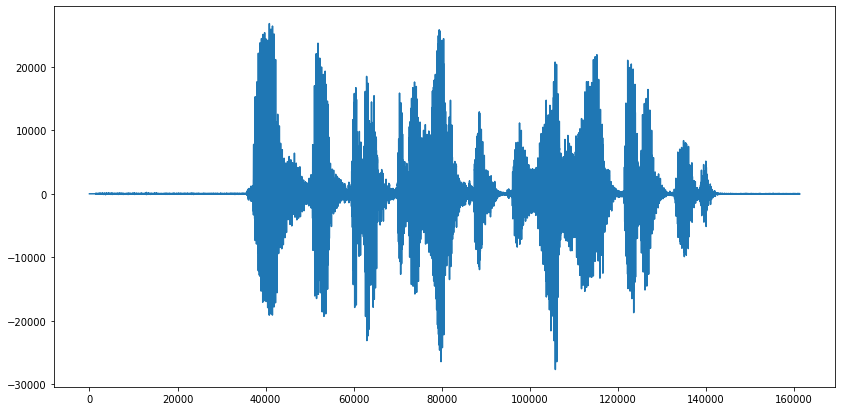

In [ ]:
# Выведем график на экран
plt.figure(figsize=(14,7))
plt.plot(audio)
plt.show()

In [ ]:
import IPython.display as ipd # Воспроизведение звуковыйх файлов

In [ ]:
ipd.Audio(data=audio[30000:150000], rate = sr)

In [ ]:
# Проверим результат работы
original = 'раз-два-три проверка студийной аппаратуры'
res = recognizeAudio('recording1.wav', duration=None)

print('Оригинал:               ', original)
print('Результат распознавания:', res)
print('WER:', wer(original.lower(), res.lower()))


Оригинал:                раз-два-три проверка студийной аппаратуры
Результат распознавания: раз-два-три проверка студийной аппаратуры
WER: 0.0
